Perusprosessissa Data Wrangling eli datan valmistelu (ETL putsaus jne) vie yleensä 80% työajasta
https://en.wikipedia.org/wiki/Data_wrangling
<br />
Luokittele sen jälkeen pystyrivit (sarakkeet) joko kategorisiin tai määrällisiin. Ja esitä analytiikan osa-alueen (perinteisen neliportaisen tason) mukaisia, siis ihmismielelle mielekkäitä, kysymyksiä aineistolle:

#### Kuvaileva analytiikka. Lähestyminen valitaan sen mukaan onko muuttuja kategorinen vai määrällinen

In [1]:
#Tuodaan käytettäväksi data-analytiikan kirjasto pandas ja lyhennetään sitä kutsuttavaksi aliaksella pd
## https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
import pandas as pd

#Tuodaan graafiseen esittämiseen matplotlib ja sen käyttöliittymäksi pyplot
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot
import matplotlib.pyplot as plt

#Katsotaan millaisia erilaisia muotoilutyylejä on saatavilla
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
#Valitaan graafinen esittäminen muotoiltavaksi tietyllä tyylillä
plt.style.use('seaborn-whitegrid')

#Tuodaan graafisen esittämisen tyylimäärittelyt erilaisilla kaaviolajeilla ja käytetään tätä tarvittaessa matplotlib esitysten "ylikirjoittamiseen" (korvaamiseen silloin kun on silmälle mukavampia vaihtoehtoja tarjolla)
import seaborn as sns

#Asetetaan näytettävien rivien rajoite (ei rajoitetta)
pd.options.display.max_rows = None
#Asetetaan näytettävien sarakkeiden rajoite (ei rajoitetta)
pd.options.display.max_columns = None
#DataFrame --> df
# CSV https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#TARKISTA TARVITAANKO
##sepstr, default ‘,’
##usecolslist-like or callable, optional
df = pd.read_csv('https://taanila.fi/employee.csv')
##Jatkossa df tulkitaan oletuksena pd:n kirjaston käyttäjäksi
#Tarkistetaan lähdetiedoston (CSV) metatiedoista monessako sarakkeessa on minkäkin verran arvoja ja mitä tyyppiä ne sisältää 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
#Kurkataan 5 vikaa riviä niinkuin Linuxissa ja nähdään siten rivien määrä
df.tail()
##tai 5 ekaa riviä
##df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [4]:
#Näytetään kymmenen pienintä arvoa sarakkeesta 'age' 
df.nsmallest(n=10,columns='Age')

Age Attrition     BusinessTravel  DailyRate              Department  \
296    18       Yes      Travel_Rarely        230  Research & Development   
301    18        No      Travel_Rarely        812                   Sales   
457    18       Yes  Travel_Frequently       1306                   Sales   
727    18        No         Non-Travel        287  Research & Development   
828    18       Yes         Non-Travel        247  Research & Development   
972    18        No         Non-Travel       1124  Research & Development   
1153   18       Yes  Travel_Frequently        544                   Sales   
1311   18        No         Non-Travel       1431  Research & Development   
127    19       Yes      Travel_Rarely        528                   Sales   
149    19        No      Travel_Rarely       1181  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
296                  3          3  Life Sciences              1   
301                 10          3        Medical              1   
457                  5          3      Marketing              1   
727                  5          2  Life Sciences              1   
828                  8          1        Medical              1   
972                  1          3  Life Sciences              1   
1153                 3          2        Medical              1   
1311                14          3        Medical              1   
127                 22          1      Marketing              1   
149                  3          1        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
296              405                        3    Male          54   
301              411                        4  Female          69   
457              614                        2    Male          69   
727             1012                        2    Male          73   
828             1156                        3    Male          80   
972             1368                        4  Female          97   
1153            1624                        2  Female          70   
1311            1839                        2  Female          33   
127              167                        4    Male          50   
149              201                        2  Female          79   

      JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
296                3         1  Laboratory Technician                3   
301                2         1   Sales Representative                3   
457                3         1   Sales Representative                2   
727                3         1     Research Scientist                4   
828                3         1  Laboratory Technician                3   
972                3         1  Laboratory Technician                4   
1153               3         1   Sales Representative                4   
1311               3         1     Research Scientist                3   
127                3         1   Sales Representative                3   
149                3         1  Laboratory Technician                2   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
296         Single           1420        25233                   1      Y   
301         Single           1200         9724                   1      Y   
457         Single           1878         8059                   1      Y   
727         Single           1051        13493                   1      Y   
828         Single           1904        13556                   1      Y   
972         Single           1611        19305                   1      Y   
1153        Single           1569        18420                   1      Y   
1311        Single           1514         8018                   1      Y   
127         Single           1675        26820                   1      Y   
149         Single           1483        16102                   1      Y  

In [5]:
#Näytetään kolme suurinta arvoa sarakkeesta 'age' 
df.nlargest(n=3,columns='Age')

Age Attrition     BusinessTravel  DailyRate              Department  \
411   60        No      Travel_Rarely        422  Research & Development   
427   60        No  Travel_Frequently       1499                   Sales   
536   60        No      Travel_Rarely       1179                   Sales   

     DistanceFromHome  Education EducationField  EmployeeCount  \
411                 7          3  Life Sciences              1   
427                28          3      Marketing              1   
536                16          4      Marketing              1   

     EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
411             549                        1  Female          41   
427             573                        3  Female          80   
536             732                        1    Male          84   

     JobInvolvement  JobLevel          JobRole  JobSatisfaction MaritalStatus  \
411               3         5          Manager                1       Married   
427               2         3  Sales Executive                1       Married   
536               3         2  Sales Executive                1        Single   

     MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  \
411          19566         3854                   5      Y       No   
427          10266         2845                   4      Y       No   
536           5405        11924                   8      Y       No   

     PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
411                 11                  3                         4   
427                 19                  3                         4   
536                 14                  3                         4   

     StandardHours  StockOptionLevel  TotalWorkingYears  \
411             80                 0                 33   
427             80                 0                 22   
536             80                 0                 10   

     TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
411                      5                1              29   
427                      5                4              18   
536                      1                3               2   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
411                   8                       11                    10  
427                  13                       13                    11  
536                   2                        2                     2

In [6]:
#Numeromuotoisen sarakkeen suodatus
##Noudetaan data framesta Pandas kirjaston toiminnolla ne rivt, joissa sarakkeen 'DistanceFromHome' arvo on suurempi kuin 20 (suodatetaan rajoittimella > 20) 
df[ df['DistanceFromHome']>20 ]
##Uloimmat hakasulut viittaavat muuttujan df "alkioon" / sarakkeeseen ja niiden hakasulkujen sisällä suoritetaan suodatus

Age Attrition     BusinessTravel  DailyRate              Department  \
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
54     26        No      Travel_Rarely       1443                   Sales   
57     35        No      Travel_Rarely       1142  Research & Development   
61     38        No  Travel_Frequently        653  Research & Development   
63     59        No      Travel_Rarely       1435                   Sales   
91     51        No      Travel_Rarely        632                   Sales   
99     44        No         Non-Travel        489  Research & Development   
112    54        No         Non-Travel        142         Human Resources   
119    43        No  Travel_Frequently        394                   Sales   
120    30        No  Travel_Frequently       1312  Research & Development   
121    33        No         Non-Travel        750                   Sales   
126    58       Yes      Travel_Rarely        147  Research & Development   
127    19       Yes      Travel_Rarely        528                   Sales   
130    43        No  Travel_Frequently        957  Research & Development   
134    26        No      Travel_Rarely       1355         Human Resources   
138    25        No      Travel_Rarely        959                   Sales   
141    45        No      Travel_Rarely       1316  Research & Development   
150    40        No  Travel_Frequently       1395  Research & Development   
162    28        No      Travel_Rarely        440  Research & Development   
163    57        No      Travel_Rarely        334  Research & Development   
181    34        No      Travel_Rarely        629  Research & Development   
192    35       Yes      Travel_Rarely        556  Research & Development   
195    37        No      Travel_Rarely        290  Research & Development   
197    42        No         Non-Travel        926  Research & Development   
199    38        No      Travel_Rarely       1084  Research & Development   
204    38       Yes      Travel_Rarely       1180  Research & Development   
205    29       Yes      Travel_Rarely        121                   Sales   
216    30       Yes  Travel_Frequently        334                   Sales   
241    32        No         Non-Travel        976                   Sales   
243    40        No      Travel_Rarely       1300  Research & Development   
259    31       Yes  Travel_Frequently        307  Research & Development   
266    31        No      Travel_Rarely       1463  Research & Development   
271    47       Yes         Non-Travel        666  Research & Development   
276    35        No      Travel_Rarely       1315  Research & Development   
286    44       Yes  Travel_Frequently        920  Research & Development   
287    38        No      Travel_Rarely        688  Research & Development   
295    42        No  Travel_Frequently        555                   Sales   
305    36        No         Non-Travel       1105  Research & Development   
307    38        No      Travel_Rarely        849  Research & Development   
324    30        No      Travel_Rarely       1275  Research & Development   
345    23        No      Travel_Rarely       1309  Research & Development   
348    42        No      Travel_Rarely        810  Research & Development   
352    48        No      Travel_Rarely        530                   Sales   
354    30        No         Non-Travel        641                   Sales   
36

In [7]:
#Tekstimuotoisen sarakkeen suodatus cast & contains 
df1 = df[ df['JobRole'].astype(str).str.contains('Manager|Research Scientist') ]
df1

Age Attrition     BusinessTravel  DailyRate              Department  \
1      49        No  Travel_Frequently        279  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
38     36        No      Travel_Rarely        852  Research & Development   
47     37        No      Travel_Rarely        408  Research & Development   
65     55        No      Travel_Rarely        836  Research & Development   
67     45        No      Travel_Rarely       1339  Research & Development   
68     35        No  Travel_Frequently        664  Research & Development   
69     36       Yes      Travel_Rarely        318  Research & Development   
71     29        No      Travel_Rarely       1328  Research & Development   
72     31        No      Travel_Rarely       1082  Research & Development   
73     32        No      Travel_Rarely        548  Research & Development   
81     35        No      Travel_Rarely       1214  Research & Development   
83     38        No         Non-Travel        573  Research & Development   
101    32        No      Travel_Rarely        827  Research & Development   
103    34        No      Travel_Rarely        665  Research & Development   
105    59        No         Non-Travel       1420         Human Resources   
108    25        No      Travel_Rarely       1280  Research & Development   
112    54        No         Non-Travel        142         Human Resources   
114    34        No      Travel_Rarely       1031  Research & Development   
116    34        No      Travel_Rarely       1354  Research & Development   
119    43        No  Travel_Frequently        394                   Sales   
120    30        No  Travel_Frequently       1312  Research & Development   
122    56       Yes      Travel_Rarely        441  Research & Development   
125    26        No      Travel_Rarely        841  Research & Development   
130    43        No  Travel_Frequently        957  Research & Development   
141    45        No      Travel_Rarely       1316  Research & Development   
142    38        No      Travel_Rarely        364  Research & Development   
143    30        No      Travel_Rarely        438  Research & Development   
145    30        No      Travel_Rarely        201  Research & Development   
147    41        No  Travel_Frequently        857  Research & Development   
150    40        No  Travel_Frequently       1395  Research & Development   
157    58        No      Travel_Rarely       1145  Research & Development   
160    22        No      Travel_Rarely       1256  Research & Development   
161    27        No         Non-Travel        691  Research & Development   
162    28        No      Travel_Rarely        440  Research & Development   
164    27        No         Non-Travel       1450  Research & Development   
165    50        No      Travel_Rarely       1452  Research & Development   
166    41        No      Travel_Rarely        465  Research & Development   
169    32        No      Travel_Rarely        120  Research & Development   
170    27        No      Travel_Rarely       1157  Research & Development   
17

In [8]:
#Katsotaan montako riviä ja saraketta muuttujassa on 
df1.shape
#394 riviä ja 35 saraketta

(394, 35)

KUVAILEVA ANALYTIIKKA (1/2): Crosstab ristiintaulukoinnilla voidaan laskea
* Kategorisista muuttujista (1/2) frekvenssijakauma (eli esiintymiskerrat) ja esittää ne taulukkona

Ristiintaulukoinnissa esitetään tulokset myös prosentteina

Pandas kirjaston crosstab vaatii syntaksissa, että lukumääräsarakkeelle annetaan joku otsikko (esim. lukumäärä, lkm)


Aineistolle esitettävä kysymys: Kuinka paljon yrityksessä on usein työn puolesta matkustavia ja harvoin matkustavia?

In [9]:
#Kategorisia muuttujia sisältävän sarakkeen 'BusinessTravel' sisältö jaoteltuna kategorioidensa mukaan
df2 = pd.crosstab(df['BusinessTravel'], 'lkm')
df2

col_0               lkm
BusinessTravel         
Non-Travel          150
Travel_Frequently   277
Travel_Rarely      1043

In [10]:
#Pandas kirjastosta automaattisesti tulevan sarakerivin nimeämisen "col_0" voi poistaa asettamalle sen sijalle tyhjää
df2.columns.name = ''
df2

lkm
BusinessTravel         
Non-Travel          150
Travel_Frequently   277
Travel_Rarely      1043

In [11]:
#Muuttujan "BusinessTravel" mahdolliset arvot "Non-Travel" ja "Travel_Frequently" sekä "Travel_Rarely" tulevat automaattisesti aakkosjärjestyksessä indeksiin ja ne voidaan uudelleen nimetä
df2.index = ['Ei matkustavia', 'Usein matkustavia', 'Harvoin matkustavia']
df2

lkm
Ei matkustavia        150
Usein matkustavia     277
Harvoin matkustavia  1043

In [12]:
#Frekvenssitaulukossa esitetään myös prosentit 
##Luodaan sarake nimeltään "%" ja asetetaan siihen kaava mitä sarakkeen arvoksi lasketaan
df2['%'] = df2['lkm']/df2['lkm'].sum()*100
df2

lkm          %
Ei matkustavia        150  10.204082
Usein matkustavia     277  18.843537
Harvoin matkustavia  1043  70.952381

Aineistolle esitettävä kysymys: Kuinka työntekijöiden työtyytyväisyys jakaantuu?

In [34]:
#crosstab vaatii syntaksissa, että lukumääräsarakkeelle annetaan joku otsikko (käytetään nyt lukumäärän "lkm" sijasta "n")
df3 = pd.crosstab(df['JobSatisfaction'], 'n')
df3.columns.name = ''
df3.index = ['Matala', 'Keskinkertainen', 'Korkea', 'Erittäin korkea']
df3.index.name = 'Työtyytyväisyys'
df3['%'] = df3['n']/df3['n'].sum()*100

#Yksi desimaali float tyyppisenä
df3.style.format({'%':'{:.1f} %'})

<AxesSubplot:ylabel='Työtyytyväisyys'>

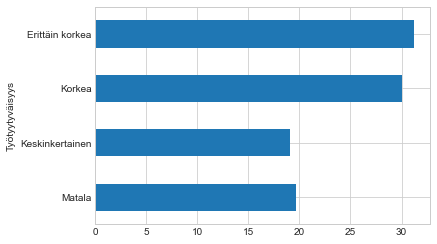

In [36]:
#Frekvenssikaavion sisällön voi esittää myös pylväskaaviona
df3['%'].plot.barh()

Text(0.5, 0, 'Lukumäärä')

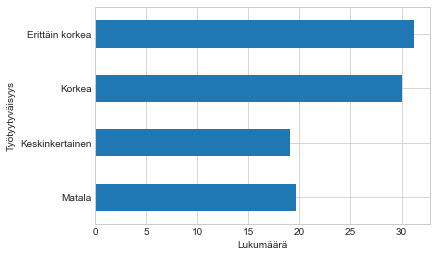

In [37]:
df3['%'].plot.barh()
#X-akselin nimeäminen
plt.xlabel('Lukumäärä')

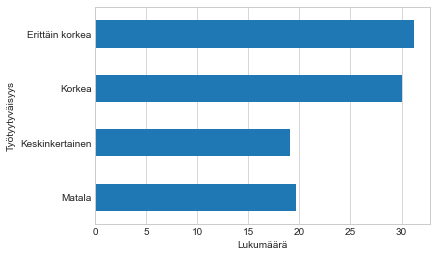

In [38]:
df3['%'].plot.barh()
plt.xlabel('Lukumäärä')
#Voidaan valita kumman akselin viivoitus näytetään
plt.grid(axis = 'y')

KUVAILEVA ANALYTIIKKA (2/2): Crosstab ristiintaulukoinnilla voidaan laskea

* Määrällisistä muuttujista (2/2) tilastolliset tunnusluvut ja esittää ne taulukkona

Tunnuslukukokoelma sisältää havaintojen lukumäärän, keskiarvon, keskihajonnan ja viiden luvun yhteenvedon


In [39]:
#Tunnuslukukokoelman saa komennolla describe()
df[['Age','MonthlyIncome']].describe()

Age  MonthlyIncome
count  1470.000000    1470.000000
mean     36.923810    6502.931293
std       9.135373    4707.956783
min      18.000000    1009.000000
25%      30.000000    2911.000000
50%      36.000000    4919.000000
75%      43.000000    8379.000000
max      60.000000   19999.000000

In [53]:
#Määrällinen muuttuja voidaan esittää luokiteltuna jakaumana
##Hyödynnetään tulevaan luokkarajaan aiemmin saadusta viiden luvun yhteenvedosta pienin ja suurin 
luokat = [18,20,30,40,50,60]

#Luodaan uusi sarake, joka kertoo matkustajan kuuluneen luokkaan 18-20, 21-30, 31-40 jne.
df['agegroup'] = pd.cut(df['Age'], bins = luokat, include_lowest=True)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
## Jotta ensimmäisen luokan alaraja otetaan mukaan ensimmäiseen luokkaan tarvitaan include_lowest = TRUE,  
## Jos oikeanpuoleisinta luokkaa ei haluttaisi mukaan tarvittaisiin right=FALSE
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

Aineistolle esitettävä kysymys: Minkälainen on yrityksen työntekijöiden ikäjakauma?

In [54]:
#Tuodaan edellisessä kohdassa luodun luokitellun jakauman sarake uuteen ristiintaulukointiin 
##crosstab vaatii syntaksissa, että lukumääräsarakkeelle annetaan joku otsikko
df4 = pd.crosstab(df['agegroup'],'n')
df4.columns.name = ''
df4.index.name = 'Ikäluokka'
df4['%'] = df4['n']/df4['n'].sum()*100
#Yksi desimaali float tyyppisenä
df4.style.format( { '%' : ' {:.1f} % '} )
df4

n          %
Ikäluokka                     
(17.999, 20.0]   28   1.904762
(20.0, 30.0]    358  24.353741
(30.0, 40.0]    619  42.108844
(40.0, 50.0]    322  21.904762
(50.0, 60.0]    143   9.727891

In [66]:
#Mielenkiintoinen tuo 17.9990
df[df['EmployeeNumber'] == 405]

Age Attrition BusinessTravel  DailyRate              Department  \
296   18       Yes  Travel_Rarely        230  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
296                 3          3  Life Sciences              1   

     EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
296             405                        3   Male          54   

     JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
296               3         1  Laboratory Technician                3   

    MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
296        Single           1420        25233                   1      Y   

    OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
296       No                 13                  3                         3   

     StandardHours  StockOptionLevel  TotalWorkingYears  \
296             80                 0                  0   

     TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
296                      2                3               0   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
296                   0                        0                     0   

           agegroup  
296  (17.999, 20.0]

<AxesSubplot:ylabel='Frequency'>

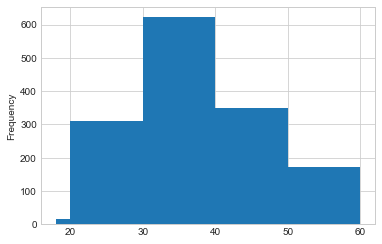

In [67]:
#Aiemmin muuttujaan "luokat" luodun luokitellun jakauman voi esittää histogrammina suoraan alkuperäisestä muuttujasta 
df['Age'].plot.hist(bins = luokat)

Text(0, 0.5, 'Lukumäärä')

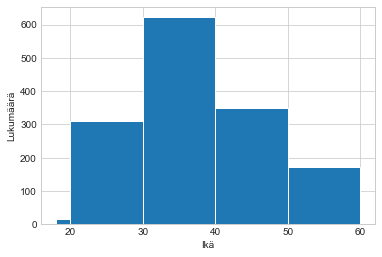

In [69]:
#Pylväiden reunojen värjäys
df['Age'].plot.hist(bins = luokat, edgecolor='white')
#Akselien nimeäminen
plt.xlabel('Ikä')
plt.ylabel('Lukumäärä')

<AxesSubplot:xlabel='Age'>

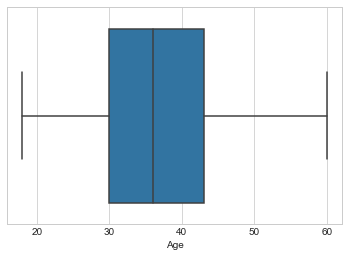

In [71]:
#Minkälainen on työntekijöiden ikäjakauma?
#Ikä-muuttujan määrällinen jakauma voidaan visualisoida viiden luvun yhteenvedosta esittämällä se Boxplot:tina 
sns.boxplot(x='Age', data = df)
#boxplot komento mahdollistaisi tarvittaessa myös y-akselin esittämisen

Yllä oleva Boxplot esittää janan vasemassa päätepisteessä viiden luvun yhteenvedosta "min", laatikon vasenreuna on alaneljännes (viivan alapuolella on 25% kaikista), laatikossa on 50% havainnoista, laatikon sisällä oleva viiva on mediaani (mediaanin molemmin puolin on yhtäpaljon havaintoja), laatikon oikeareuna on yläneljännes (viivan yläpuolella on 25% kaikista) ja janan oikeassa päätepisteessä on viiden luvun yhteenvedosta "max". Mikäli janan ulkopuolelle jää poikkeamia (anomaly) ei janan päätepiste silloin tietenkään ollut "min/max" havainto vaan "min/max" anomalia on se "min/max"

Jos alaneljänneksen matka mediaaniin on huomattavasti lyhyempi kuin mediaanin matka yläneljännekseen, on jakauma vino oikealle.

In [72]:
from datetime import datetime
print(f'Lopeteltu {datetime.now()}')

Lopeteltu 2021-04-15 21:14:07.563940
